In [1]:
import pandas as pd
import matplotlib.pyplot as plt

load_data = pd.read_csv('../results/load_measure.csv')
vect_data = pd.read_csv('../results/vectorize_measure.csv')

In [2]:
load_data

,tweets,time,mem
0,9431,18.692743,174973694
1,19234,27.930743,178411252
2,41015,47.659166,185934989
3,79139,91.013920,198687461
4,161137,174.558844,226722571
5,324798,338.055760,282997124
6,657700,676.651826,397181578
7,1309538,1338.145949,620106674
8,2630811,2797.765315,1073801735


In [3]:
vect_data

,tweets,time,mem,cols
0,9431,1.818656,173422056,14167
1,19234,1.385756,174927014,24770
2,41015,1.437935,177995455,43207
3,79139,1.748358,182803427,67165
4,161137,1.781288,193177125,115088
5,324798,1.790863,212943742,192421
6,657700,2.887546,251672800,323737
7,1309538,3.730307,324415152,530610


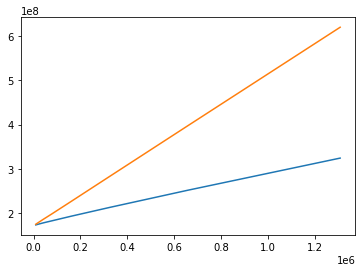

In [4]:
plt.plot(vect_data['tweets'], vect_data['mem'])
plt.plot(load_data['tweets'].iloc[:-1], load_data['mem'].iloc[:-1])

In [5]:
# Vocabulary should not be increasing linearly! this is not what I was promised
# mem increases linearly in function of cols/tweets ... as if each tweet is adding at least one new, unique word not found in any other tweet: URLs!?
# what's gonna help: stemming, filter dictionary?
